In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
data_232 = pd.read_csv('./Data/NA232.csv')
data_232.set_index('PSNO_NA_ECP', inplace=True)
data_232 = data_232.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-232 (Based on ECP Form-45s)

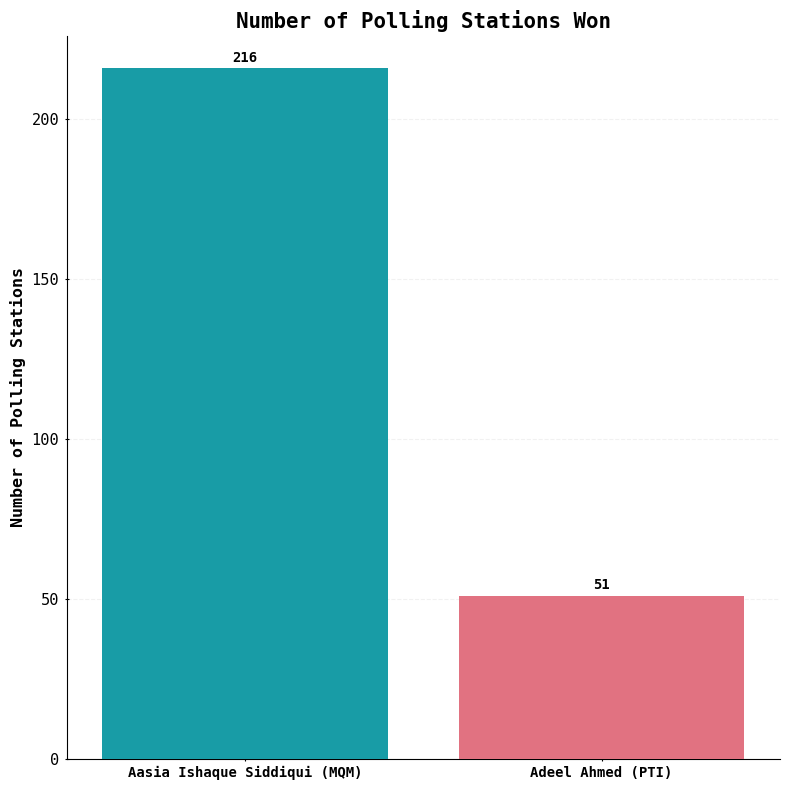

In [19]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_232_ECP_Winner = data_232['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_232_ECP_Winner))]

plt.figure(figsize=(8, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_232_ECP_Winner.index,
    y=data_232_ECP_Winner.values,
    hue=data_232_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_232_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
# plt.text(
#     0.5, -0.15,
#     'Figure 1: This chart shows the number of polling stations won by each candidate in NA-232, based on ECP Form-45 data. Dawa Khan Sabir of PTI led in 185 polling stations,\n' 
#     'while Mustafa Kamal of MQM won in only 101. This suggests a possible discrepancy, as it raises the question of how MQM secured the overall win despite winning \n'
#     'significantly fewer stations. It indicates that MQM’s victories may have come from polling stations with disproportionately high voter turnout.\n(Source: ECP Form-45s)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     wrap=False,
#     transform=plt.gca().transAxes
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s)


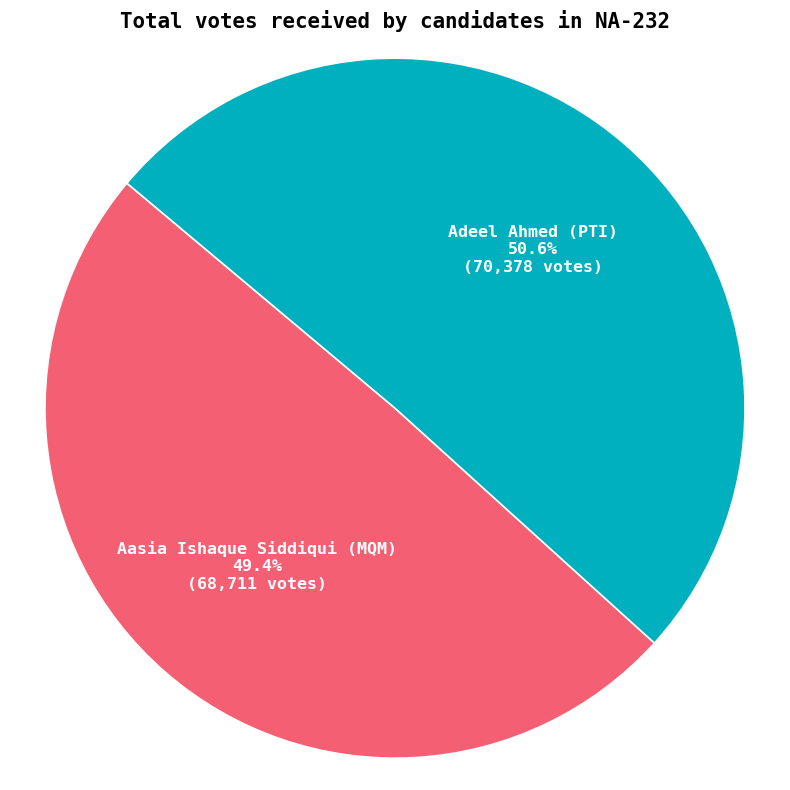

In [20]:
# Convert string values to numeric, handling 'Missing' values
data_232['OPP_VOTES_ECP'] = pd.to_numeric(data_232['OPP_VOTES_ECP'], errors='coerce')
data_232['PTI_VOTES_ECP'] = pd.to_numeric(data_232['PTI_VOTES_ECP'], errors='coerce')

# Sum the votes
data_232_votes_ecp = data_232[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']].sum()
data_232_votes_ecp.index = ['Aasia Ishaque Siddiqui (MQM)', 'Adeel Ahmed (PTI)']
candidate_colors = {
    'Aasia Ishaque Siddiqui (MQM)': pink,
    'Adeel Ahmed (PTI)': blue
}
colors = [candidate_colors[name] for name in data_232_votes_ecp.index]
labels = data_232_votes_ecp.index
values = data_232_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-232', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
# plt.text(
#     0.5, -0.1,
#     'Figure 2: Total votes received by candidates in NA-232 based on ECP Form-45s. Despite winning in fewer polling stations, Syed Mustafa Kamal of MQM secured 71,597 votes (57.1%),\n'
#     'compared to 53,789 votes (42.9%) for Dawa Khan Sabir of PTI. This margin of 17,808 votes suggests that MQM’s support was concentrated in stations with significantly higher turnout.\n (Source: ECP Form-45s)',
#     wrap=False,
#     fontsize=10,
#     ha='center',
#     va='center',
#     transform=plt.gca().transAxes
# )

plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-242 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_52384/1071960320.py:22: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_52384/1071960320.py:22: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


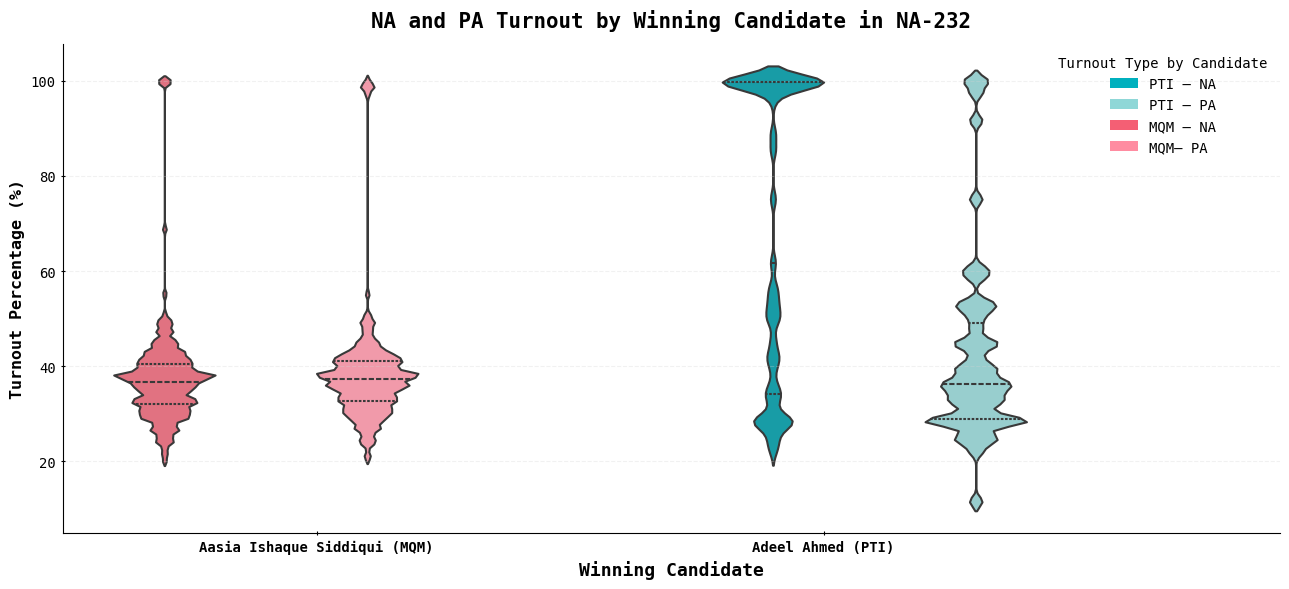

In [26]:
df_long = data_232[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].replace('#VALUE!', np.nan)
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)
df_long.dropna(inplace=True)

# Define colors for the violin plot
palette = {
    ('Adeel Ahmed (PTI)', 'NA'): blue,
    ('Adeel Ahmed (PTI)', 'PA'): light_blue,
    ('Aasia Ishaque Siddiqui (MQM)', 'NA'): pink,
    ('Aasia Ishaque Siddiqui (MQM)', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(13, 6))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-232', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)

# plt.text(
#     0.5, -0.3,
#     'Figure 3: The violin plot shows the distribution of NA and PA turnout percentages in polling stations won by each candidate in NA-232, based on ECP Form-45s. \n'
#     'For Dawa Khan Sabir, both NA and PA turnout distributions are centered around the 20–40% range, suggesting consistent voter behavior. \n'
#     'In contrast, for Syed Mustafa Kamal, the PA turnout remains in the expected 20–40% range, while NA turnout is heavily skewed toward 80–100%. \n'
#     'This stark difference raises questions about the validity of such high NA turnouts in the same polling stations where PA turnout remained typical, \n'
#     'and may suggest irregularities in vote reporting or ballot stuffing in the NA race.\n(Source: ECP Form-45s)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     wrap=False,
#     transform=ax.transAxes
# )

plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

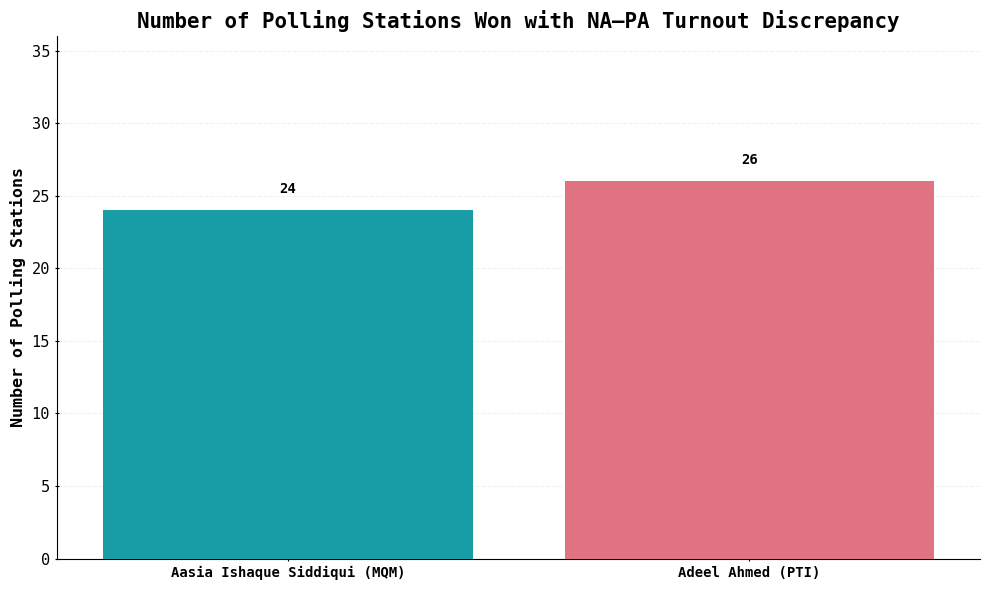

In [29]:
data_232_Discrepency = data_232[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_232_Discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_232_Discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_232_Discrepency = data_232_Discrepency.dropna()
data_232_Discrepency = data_232_Discrepency[abs(data_232_Discrepency['TURNOUT_DIFFERENCE'].astype(int)) >= 50]

data_232_ECP_Winner_discrepency = data_232_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_232_ECP_Winner_discrepency))]

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = sns.barplot(
    x=data_232_ECP_Winner_discrepency.index,
    y=data_232_ECP_Winner_discrepency.values,
    hue=data_232_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_232_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# plt.text(
#     0.5, -0.15,
#     'Figure 4: Number of polling stations in NA-232 where the difference between PA and NA turnout exceeded 50 votes. Dawa Khan Sabir won only 9 such stations, while \n'
#     'Syed Mustafa Kamal won 56. This suggests that a majority of the polling stations with significant turnout discrepancies favored Mustafa Kamal, raising concerns \n'
#     'about potential irregularities in vote counts or ballot stuffing.\n(Source: ECP Form-45s)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     transform=plt.gca().transAxes,
#     wrap=False
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-242 (Based on ECP Form-45s)

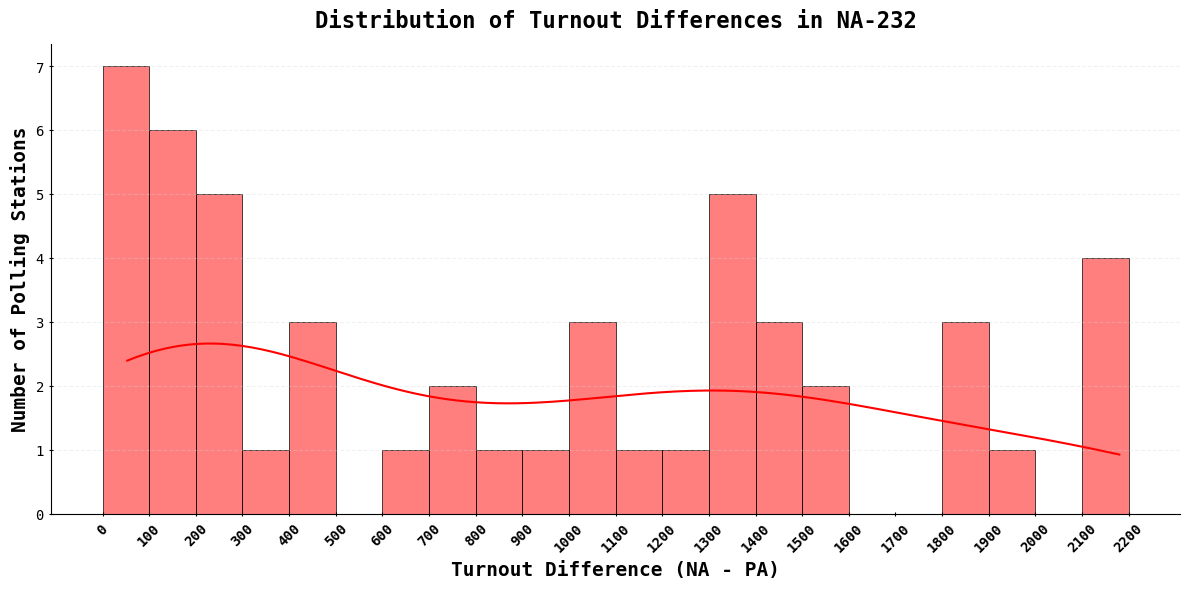

In [33]:
data_232_discrepency = data_232[['TURNOUT_DIFFERENCE']].copy()
data_232_discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_232_discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_232_discrepency = data_232_discrepency.dropna()
data_232_discrepency = data_232_discrepency[abs(data_232_discrepency['TURNOUT_DIFFERENCE'].astype(int)) >= 50]

min_diff = (data_232_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_232_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_232_discrepency,
    x='TURNOUT_DIFFERENCE',
    bins=bin_edges,
    kde=True,
    color='red',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('Turnout Difference (NA - PA)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=14, fontweight='bold')
plt.title('Distribution of Turnout Differences in NA-232', fontsize=16, fontweight='bold', pad=12)
plt.xticks(bin_edges, fontsize=10, fontweight='semibold', rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
# plt.text(
#     0.5, -0.3,
#     'Figure 5: The histogram illustrates the distribution of turnout differences between NA and PA votes in NA-232 polling stations. A substantial number of polling \n'
#     'stations showed differences ranging from 100 to over 1400 votes. Notably, 10 stations had differences in the 800–900 range, while 10 stations fell between 900–1000.\n'
#     'This concentration of unusually high discrepancies suggests patterns that warrant further scrutiny.\n(Source: ECP Form-45s) -- (Note: Differences below 50 have been excluded)',
#     fontsize=10,
#     ha='center',
#     va='center',
#     transform=plt.gca().transAxes,
#     wrap=False
# )
plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()